In [1]:
# preample
import matplotlib.pyplot as plt
from scipy.signal import freqs,periodogram
import numpy as np
from simulator_V2 import Noise_Layer
from tensorflow.keras import layers, Model

C:\ProgramData\Anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\tf_env\lib\site-packages\tensorflow\pyth

In [5]:
profiles = [5]
T        = 1
M        = 1024
K        = 2000

In [6]:
dummy_input       = layers.Input(shape=(1,))
noise_time_domain = Noise_Layer(T, M, K, profiles[0], name="noise")(dummy_input)
model             = Model( inputs = dummy_input, outputs=noise_time_domain )
model.summary()
noise = model.predict(np.ones((1,)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
noise (Noise_Layer)          (None, 1024, 2000, 1)     0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


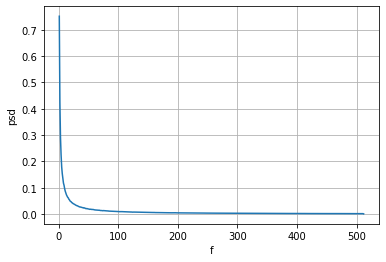

In [7]:
# display noise if exists
for idx_profile,profile in enumerate(profiles): 
    if profile in [2,3,4] or (profile==6 and p==0): 
        # estimate the correlation matrix of the noise
        correlation = 0
        for k in range(K):
            correlation = correlation + noise[0,:,k:k+1,idx_profile]@noise[0,:,k:k+1,idx_profile].T
        correlation = correlation/K
        # plot correlation matrix
        plt.figure()
        plt.matshow(correlation,0)
        plt.colorbar()
        p = 0
    elif profile in [1,5]:
        # estimate the PSD of the noise
        psd = 0
        for k in range(K):
            f, Pxx = periodogram(noise[0,:,k,idx_profile],M/T)            
            psd = psd + Pxx
        psd = psd/K
        plt.figure()
        plt.plot(f[f>0], psd[1:])
        plt.xlabel('f')
        plt.ylabel('psd')
        plt.grid()
        p = 1